In [1]:
from sage.misc.prandom import randrange
from sage.misc.randstate import current_randstate
def kvadrat(m,n,vel): # m stevilo proizvajalcev, n stevilo porabnikov
    s = ([[(RR.random_element(-vel,vel),RR.random_element(-vel,vel)),ZZ.random_element(1,10)] for i in range(m)])
    d = ([[(RR.random_element(-vel,vel),RR.random_element(-vel,vel)),ZZ.random_element(1,10)] for j in range(n)])
    vsota_proizvodnje = sum(k for xy, k in s)
    for i in range(len(s)):
        s[i][1] = s[i][1] * (1/vsota_proizvodnje)
    vsota_porabe = sum(k for xy, k in d)
    for j in range(len(d)):
        d[j][1] = d[j][1] * (1/vsota_porabe)
    return s,d

def krog(m,n,radij_kroga):
    s = []
    d = []
    while len(s) < m:
        x = RR.random_element(-radij_kroga,radij_kroga)
        y = RR.random_element(-radij_kroga,radij_kroga)
        razdalja = sqrt(x^2+y^2)
        if razdalja <= radij_kroga:
            s.append([(x,y),ZZ.random_element(1,10)])
        else:
            continue
    while len(d) < n:
        x = RR.random_element(-radij_kroga,radij_kroga)
        y = RR.random_element(-radij_kroga,radij_kroga)
        razdalja = sqrt(x^2+y^2)
        if razdalja <= radij_kroga:
            d.append([(x,y),ZZ.random_element(1,10)])
        else:
            continue
    vsota_proizvodnje = sum(k for xy, k in s)
    for i in range(len(s)):
        s[i][1] = s[i][1] * (1/vsota_proizvodnje)
    vsota_porabe = sum(k for xy, k in d)
    for j in range(len(d)):
        d[j][1] = d[j][1] * (1/vsota_porabe)
    return s,d

def strani(m,n,vel):
    s = ([[(-5,RR.random_element(-vel,vel)),ZZ.random_element(1,10)] for i in range(m)])
    d = ([[(5,RR.random_element(-vel,vel)),ZZ.random_element(1,10)] for j in range(n)])
    vsota_proizvodnje = sum(k for xy, k in s)
    for i in range(len(s)):
        s[i][1] = s[i][1] * (1/vsota_proizvodnje)
    vsota_porabe = sum(k for xy, k in d)
    for j in range(len(d)):
        d[j][1] = d[j][1] * (1/vsota_porabe)
    return s,d

def program(s,d):
    m = len(s)
    n = len(d)
    p = MixedIntegerLinearProgram(maximization=False)
    b = p.new_variable(binary=True)
    c = p.new_variable(nonnegative=True)
    p.set_objective(p['l'])
    p.add_constraint((p['l']) >= 0)
    for i, ((sx, sy), sk) in enumerate(s):
        for j, ((dx, dy), dk) in enumerate(d):
            p.add_constraint(b[i, j] * sqrt((dx-sx)^2 + (dy-sy)^2) <= p['l'])
            p.add_constraint(c[i, j] >= 0)
            p.add_constraint(c[i, j] <= sk * b[i, j])
    for i, (sxy, sk) in enumerate(s):
        p.add_constraint(p.sum(c[i, j] for j in range(n)) == sk)
     for j, (dxy, dk) in enumerate(d):
        p.add_constraint(p.sum(c[i, j] for i in range(m)) == dk)
    z = p.solve()
    povezave = p.get_values(b)
    kolicine = p.get_values(c)
    return z, povezave, kolicine

class Vozlisce:
    """Objekti, ki predstavljajo vozlišča."""

    def __init__(self, xy, k):
        """Hranimo pozicijo in količino."""
        self.xy = xy
        self.k = k

    def __str__(self):
        """Na vozlišču naj se izpiše količina."""
        return str(self.k) # izpisalo se bo kot ulomek, ker tako generirata podatke - lahko pa naredita kot spodaj, da se izpiše z decimalkami

class Razvoz(DiGraph):
    """Usmerjen graf, ki predstavlja razvoz."""

    def __init__(self, s, d, povezave, kolicine):
        """"Podamo seznama proizvajalcev in porabnikov ter slovarja povezav in količin."""
        ss = [Vozlisce(*xyk) for xyk in s] # seznam vozlišč za proizvajalce
        dd = [Vozlisce(*xyk) for xyk in d] # seznam vozlišč za porabnike
        # inicializacija grafa s povezavami - oznake sestojijo iz prepeljanih količin in razdalje med vozliščema
        super().__init__([(ss[i], dd[j], '%.2f\n%.2f' % (kolicine[i, j], sqrt(sum((sw-dw)^2 for sw, dw in
                                                                                  zip(s[i][0], d[j][0])))))
                          for (i, j), v in povezave.items() if v])
        self.set_pos({u: u.xy for u in self}) # nastavimo pozicije vozlišč pri izrisovanju
        self.barve = {"lightblue": ss, "lightgreen": dd} # nastavimo privzete barve vozliščem

    def graphplot(self, **options):
        """Metoda za izrisovanje grafa z nastavitvijo privzetih vrednosti."""
        options.setdefault('edge_labels', True) # na povezavah naj se izpišejo količine
        options.setdefault('vertex_colors', self.barve) # uporabimo privzete barve vozlišč
        options.setdefault('vertex_size', 500)
        options.setdefault('figsize', [8, 6])
        # options.setdefault('edge_thickness',0.1)
        # options.setdefault('edge_labels_background', 'transparent')
        return super().graphplot(**options)

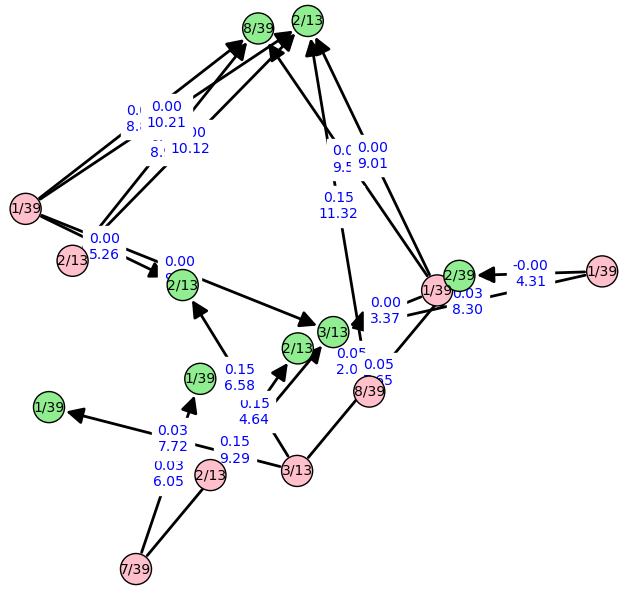

In [2]:
with seed(10):
    k, l = kvadrat(8,8,10)
z, povezave, kolicine = program(k, l)
Razvoz(k, l, povezave, kolicine).plot()

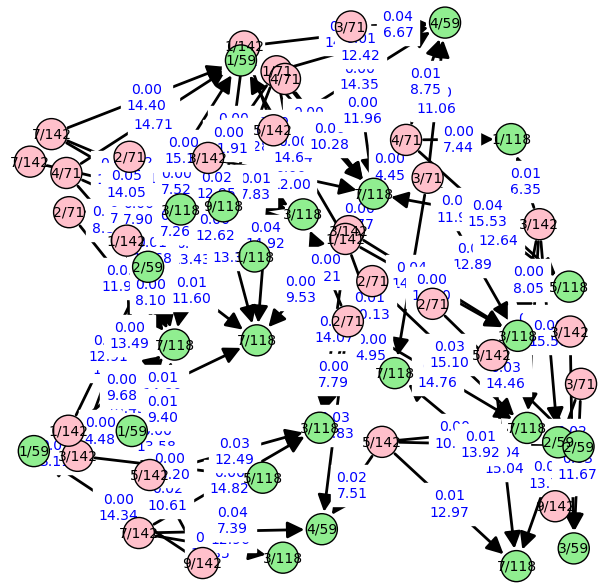

In [3]:
with seed(11):
    k_1, l_1 = kvadrat(30,25,20)
z_1, povezave_1, kolicine_1 = program(k_1, l_1)
Razvoz(k_1, l_1, povezave_1, kolicine_1).plot()

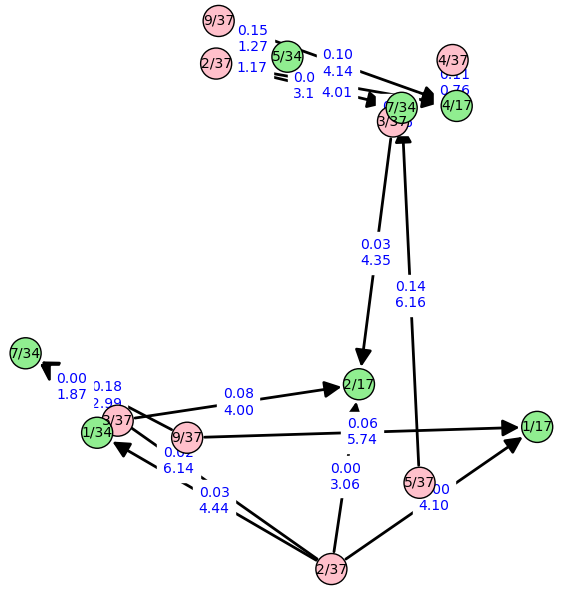

In [4]:
with seed(5):
    u, v = krog(8,7,5)
l, povezave_2, kolicine_2 = program(u, v)
Razvoz(u, v, povezave_2, kolicine_2).plot()

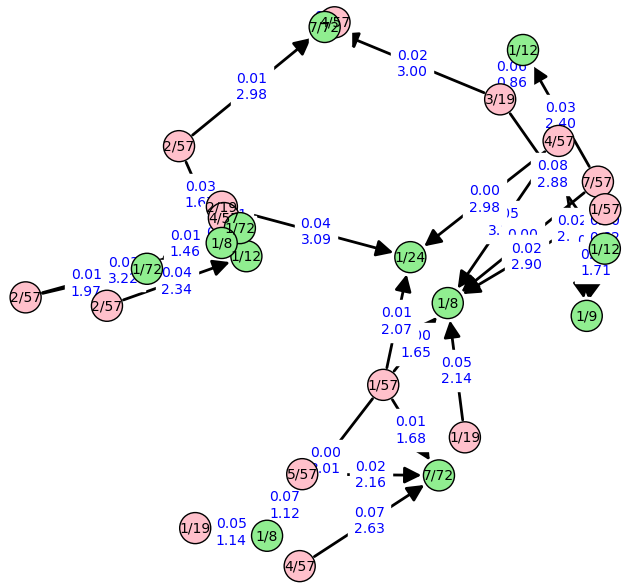

In [5]:
with seed(13):
    u_1, v_1 = krog(15,12,5)
l_1, povezave_1, kolicine_1 = program(u_1, v_1)
Razvoz(u_1, v_1, povezave_1, kolicine_1).plot()

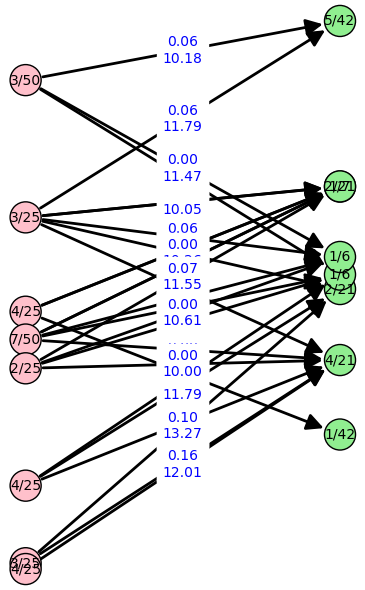

In [6]:
with seed(1):
    j, m = strani(8,8,10)
o, povezave_1, kolicine_1 = program(j, m)
Razvoz(j, m, povezave_1, kolicine_1).plot()

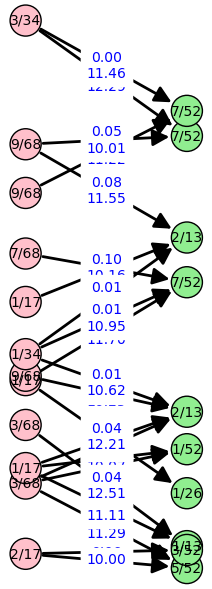

In [8]:
with seed(17):
    a, b = strani(12,10,20)
c, povezave_1, kolicine_1 = program(a, b)
Razvoz(a, b, povezave_1, kolicine_1).plot()